In [20]:
import numpy as np
import pandas as pd 
import datetime
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import bisect
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [36]:
def gather_results(sex, nbacks, path='../../data/pred_timechange/'):
    df = list()
    for nback in nbacks:
        scaler = pickle.load(open('../results/scalers/'+sex+'_'+str(nback)+'.pkl', 'rb'))
        dfsub = pd.read_pickle(path+'data_res_'+sex+'_'+str(nback)+'.pkl')
        dfsub[dfsub.columns[:-107]] = scaler.inverse_transform(dfsub[dfsub.columns[:-107]])
        df.append(dfsub)
    df = pd.concat(df)
    df = df[~df.index.duplicated(keep='last')]
    return(df)

def get_closest_pred(x):
    intvals = list(range(-364, 371, 7))
    i = bisect.bisect_right(intvals, x)
    return(intvals[i])

def get_first_pos_pred(x, fulldf):
    firstcol = list(fulldf.columns).index('Hbdef_pred_' + str(int(x['first_possible_invite'])))
    all_pred_0 = x[firstcol:122][x[firstcol:122] == 0]
    if len(all_pred_0) == 0:
        return(np.nan)
    else:
        return(x[firstcol:122][x[firstcol:122] == 0].index[0][11:])

In [31]:
df_f = gather_results('women', range(1,6))
df_m = gather_results('men', range(1,6))

In [32]:
df_f.head()

,age,month,smoking,height,weight,bmi,snp_17_58358769,snp_6_32617727,snp_15_45095352,snp_1_169549811,prs_anemia,prs_ferritin,prs_hemoglobin,HbPrev1,DaystoPrev1,Hb_deferral,Hbdef_pred,Hbdef_pred_-364,Hbdef_pred_-357,Hbdef_pred_-350,Hbdef_pred_-343,Hbdef_pred_-336,Hbdef_pred_-329,Hbdef_pred_-322,Hbdef_pred_-315,Hbdef_pred_-308,Hbdef_pred_-301,Hbdef_pred_-294,Hbdef_pred_-287,Hbdef_pred_-280,Hbdef_pred_-273,Hbdef_pred_-266,Hbdef_pred_-259,Hbdef_pred_-252,Hbdef_pred_-245,Hbdef_pred_-238,Hbdef_pred_-231,Hbdef_pred_-224,Hbdef_pred_-217,Hbdef_pred_-210,Hbdef_pred_-203,Hbdef_pred_-196,Hbdef_pred_-189,Hbdef_pred_-182,Hbdef_pred_-175,Hbdef_pred_-168,Hbdef_pred_-161,Hbdef_pred_-154,Hbdef_pred_-147,Hbdef_pred_-140,Hbdef_pred_-133,Hbdef_pred_-126,Hbdef_pred_-119,Hbdef_pred_-112,Hbdef_pred_-105,Hbdef_pred_-98,Hbdef_pred_-91,Hbdef_pred_-84,Hbdef_pred_-77,Hbdef_pred_-70,Hbdef_pred_-63,Hbdef_pred_-56,Hbdef_pred_-49,Hbdef_pred_-42,Hbdef_pred_-35,Hbdef_pred_-28,Hbdef_pred_-21,Hbdef_pred_-14,Hbdef_pred_-7,Hbdef_pred_0,Hbdef_pred_7,Hbdef_pred_14,Hbdef_pred_21,Hbdef_pred_28,Hbdef_pred_35,Hbdef_pred_42,Hbdef_pred_49,Hbdef_pred_56,Hbdef_pred_63,Hbdef_pred_70,Hbdef_pred_77,Hbdef_pred_84,Hbdef_pred_91,Hbdef_pred_98,Hbdef_pred_105,Hbdef_pred_112,Hbdef_pred_119,Hbdef_pred_126,Hbdef_pred_133,Hbdef_pred_140,Hbdef_pred_147,Hbdef_pred_154,Hbdef_pred_161,Hbdef_pred_168,Hbdef_pred_175,Hbdef_pred_182,Hbdef_pred_189,Hbdef_pred_196,Hbdef_pred_203,Hbdef_pred_210,Hbdef_pred_217,Hbdef_pred_224,Hbdef_pred_231,Hbdef_pred_238,Hbdef_pred_245,Hbdef_pred_252,Hbdef_pred_259,Hbdef_pred_266,Hbdef_pred_273,Hbdef_pred_280,Hbdef_pred_287,Hbdef_pred_294,Hbdef_pred_301,Hbdef_pred_308,Hbdef_pred_315,Hbdef_pred_322,Hbdef_pred_329,Hbdef_pred_336,Hbdef_pred_343,Hbdef_pred_350,Hbdef_pred_357,Hbdef_pred_364,HbPrev2,DaystoPrev2,HbPrev3,DaystoPrev3,HbPrev4,DaystoPrev4,HbPrev5,DaystoPrev5
305,58.0,4.0,0.0,179.0,97.0,30.273712,0.0,0.0,0.0,0.0,-6.547531e-07,-3.974866e-07,1.713250e-06,139.0,348.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2342,53.0,3.0,0.0,164.0,73.0,27.141582,0.0,0.0,1.0,0.0,1.203807e-06,-2.830625e-06,-3.658150e-07,132.0,405.0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8459,40.0,5.0,0.0,178.0,86.0,27.143037,0.0,1.0,0.0,0.0,-4.232412e-07,-8.141728e-07,-1.019563e-05,125.0,468.0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26606,54.0,6.0,0.0,170.0,92.0,31.833910,0.0,2.0,0.0,0.0,-9.774603e-07,-3.571038e-06,-4.424627e-06,131.0,1014.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27630,52.0,8.0,0.0,162.0,83.0,31.626276,0.0,1.0,0.0,0.0,1.364758e-07,2.529477e-06,5.565484e-06,135.0,131.0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_f['first_possible_donation'] = df_f['DaystoPrev1'] * -1 + 91
df_m['first_possible_donation'] = df_m['DaystoPrev1'] * -1 + 61
df_f['first_possible_invite'] = df_f['first_possible_donation'].apply(get_closest_pred)
df_m['first_possible_invite'] = df_m['first_possible_donation'].apply(get_closest_pred)

df_f.head()

df_f['first_pos_pred'] = pd.to_numeric(df_f.apply(get_first_pos_pred, fulldf=df_f, axis=1))
df_m['first_pos_pred'] = pd.to_numeric(df_m.apply(get_first_pos_pred, fulldf=df_m, axis=1))

In [35]:
df_f.shape

(21595, 132)

In [38]:
df_f.head()

,age,month,smoking,height,weight,bmi,snp_17_58358769,snp_6_32617727,snp_15_45095352,snp_1_169549811,prs_anemia,prs_ferritin,prs_hemoglobin,HbPrev1,DaystoPrev1,Hb_deferral,Hbdef_pred,Hbdef_pred_-364,Hbdef_pred_-357,Hbdef_pred_-350,Hbdef_pred_-343,Hbdef_pred_-336,Hbdef_pred_-329,Hbdef_pred_-322,Hbdef_pred_-315,Hbdef_pred_-308,Hbdef_pred_-301,Hbdef_pred_-294,Hbdef_pred_-287,Hbdef_pred_-280,Hbdef_pred_-273,Hbdef_pred_-266,Hbdef_pred_-259,Hbdef_pred_-252,Hbdef_pred_-245,Hbdef_pred_-238,Hbdef_pred_-231,Hbdef_pred_-224,Hbdef_pred_-217,Hbdef_pred_-210,Hbdef_pred_-203,Hbdef_pred_-196,Hbdef_pred_-189,Hbdef_pred_-182,Hbdef_pred_-175,Hbdef_pred_-168,Hbdef_pred_-161,Hbdef_pred_-154,Hbdef_pred_-147,Hbdef_pred_-140,Hbdef_pred_-133,Hbdef_pred_-126,Hbdef_pred_-119,Hbdef_pred_-112,Hbdef_pred_-105,Hbdef_pred_-98,Hbdef_pred_-91,Hbdef_pred_-84,Hbdef_pred_-77,Hbdef_pred_-70,Hbdef_pred_-63,Hbdef_pred_-56,Hbdef_pred_-49,Hbdef_pred_-42,Hbdef_pred_-35,Hbdef_pred_-28,Hbdef_pred_-21,Hbdef_pred_-14,Hbdef_pred_-7,Hbdef_pred_0,Hbdef_pred_7,Hbdef_pred_14,Hbdef_pred_21,Hbdef_pred_28,Hbdef_pred_35,Hbdef_pred_42,Hbdef_pred_49,Hbdef_pred_56,Hbdef_pred_63,Hbdef_pred_70,Hbdef_pred_77,Hbdef_pred_84,Hbdef_pred_91,Hbdef_pred_98,Hbdef_pred_105,Hbdef_pred_112,Hbdef_pred_119,Hbdef_pred_126,Hbdef_pred_133,Hbdef_pred_140,Hbdef_pred_147,Hbdef_pred_154,Hbdef_pred_161,Hbdef_pred_168,Hbdef_pred_175,Hbdef_pred_182,Hbdef_pred_189,Hbdef_pred_196,Hbdef_pred_203,Hbdef_pred_210,Hbdef_pred_217,Hbdef_pred_224,Hbdef_pred_231,Hbdef_pred_238,Hbdef_pred_245,Hbdef_pred_252,Hbdef_pred_259,Hbdef_pred_266,Hbdef_pred_273,Hbdef_pred_280,Hbdef_pred_287,Hbdef_pred_294,Hbdef_pred_301,Hbdef_pred_308,Hbdef_pred_315,Hbdef_pred_322,Hbdef_pred_329,Hbdef_pred_336,Hbdef_pred_343,Hbdef_pred_350,Hbdef_pred_357,Hbdef_pred_364,HbPrev2,DaystoPrev2,HbPrev3,DaystoPrev3,HbPrev4,DaystoPrev4,HbPrev5,DaystoPrev5,first_possible_donation,first_possible_invite,first_pos_pred
305,58.0,4.0,0.0,179.0,97.0,30.273712,0.0,0.0,0.0,0.0,-6.547531e-07,-3.974866e-07,1.713250e-06,139.0,348.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-257.0,-252,-252.0
2342,53.0,3.0,0.0,164.0,73.0,27.141582,0.0,0.0,1.0,0.0,1.203807e-06,-2.830625e-06,-3.658150e-07,132.0,405.0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-314.0,-308,-168.0
8459,40.0,5.0,0.0,178.0,86.0,27.143037,0.0,1.0,0.0,0.0,-4.232412e-07,-8.141728e-07,-1.019563e-05,125.0,468.0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-377.0,-364,238.0
26606,54.0,6.0,0.0,170.0,92.0,31.833910,0.0,2.0,0.0,0.0,-9.774603e-07,-3.571038e-06,-4.424627e-06,131.0,1014.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-923.0,-364,-364.0
27630,52.0,8.0,0.0,162.0,83.0,31.626276,0.0,1.0,0.0,0.0,1.364758e-07,2.529477e-06,5.565484e-06,135.0,131.0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-40.0,-35,-35.0


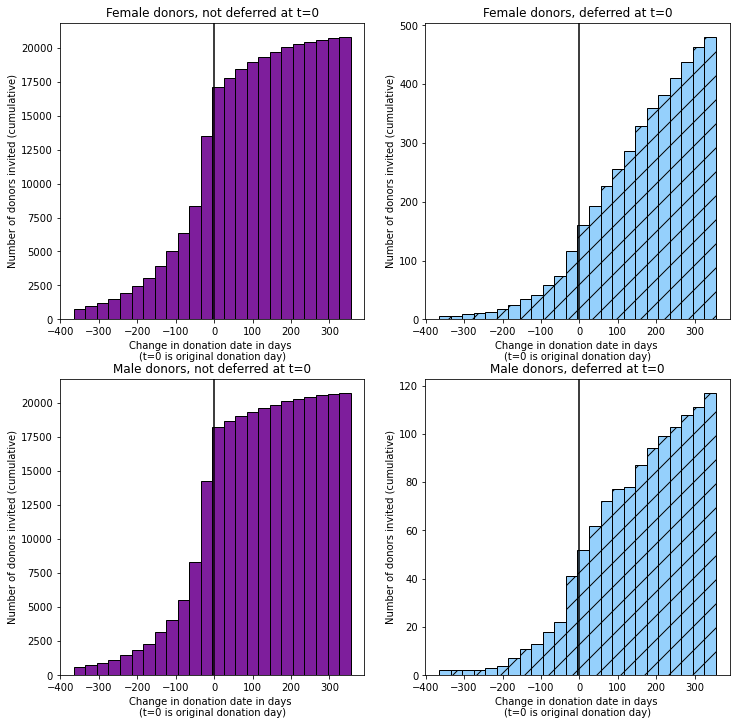

<Figure size 432x288 with 0 Axes>

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(12,12))

df_f_nonan = df_f.dropna(subset=['first_pos_pred'])
df_m_nonan = df_m.dropna(subset=['first_pos_pred'])

ax[0,0].hist(df_f_nonan.loc[df_f_nonan['Hb_deferral'] == 0, 'first_pos_pred'], bins=range(-365, 365, 30), cumulative=True, 
             facecolor='xkcd:purple', edgecolor='k',fill=True)
ax[0,1].hist(df_f_nonan.loc[df_f_nonan['Hb_deferral'] == 1, 'first_pos_pred'], bins=range(-365, 365, 30), cumulative=True, 
             facecolor='xkcd:light blue', hatch='/', edgecolor='k',fill=True)
ax[1,0].hist(df_m_nonan.loc[df_m_nonan['Hb_deferral'] == 0, 'first_pos_pred'], bins=range(-365, 365, 30), cumulative=True, 
             facecolor='xkcd:purple', edgecolor='k',fill=True)
ax[1,1].hist(df_m_nonan.loc[df_m_nonan['Hb_deferral'] == 1, 'first_pos_pred'], bins=range(-365, 365, 30), cumulative=True, 
             facecolor='xkcd:light blue', hatch='/', edgecolor='k',fill=True)

ax[0,0].set_title('Female donors, not deferred at t=0')
ax[0,1].set_title('Female donors, deferred at t=0')
ax[1,0].set_title('Male donors, not deferred at t=0')
ax[1,1].set_title('Male donors, deferred at t=0')

ax[0,0].axvline(0, color='black')
ax[0,1].axvline(0, color='black')
ax[1,0].axvline(0, color='black')
ax[1,1].axvline(0, color='black')

for aks in ax.flatten():
    aks.set_xlabel('Change in donation date in days \n(t=0 is original donation day)')
    aks.set_ylabel('Number of donors invited (cumulative)')

plt.show()
plt.savefig('../results/plots_performance/invites_datechange.png')

In [41]:
df_f['sex'] = 'F'
df_m['sex'] = 'M'
df_intervals = pd.concat([df_f, df_m]).loc[:, ['sex', 'age', 'DaystoPrev1', 'first_pos_pred', 'Hb_deferral', 'Hbdef_pred']]
df_intervals['DaystoPrevNew'] = df_intervals['DaystoPrev1'] + df_intervals['first_pos_pred']
df_intervals.head()

,sex,age,DaystoPrev1,first_pos_pred,Hb_deferral,Hbdef_pred,DaystoPrevNew
305,F,58.0,348.0,-252.0,0,0,96.0
2342,F,53.0,405.0,-168.0,0,0,237.0
8459,F,40.0,468.0,238.0,0,1,706.0
26606,F,54.0,1014.0,-364.0,0,0,650.0
27630,F,52.0,131.0,-35.0,1,0,96.0


In [12]:
df_intervals.groupby('Sex').describe()

Age                                                         \
        count       mean        std        min        25%        50%   
Sex                                                                    
F    110372.0  36.031470  13.887671  18.058864  23.996578  31.427789   
M     98324.0  38.153669  13.399088  18.053388  26.814511  35.008898   

                          TimetoPrev1                                      \
           75%        max       count        mean         std  min    25%   
Sex                                                                         
F    48.167009  74.182067    110372.0  181.371245  142.833526  1.0  125.0   
M    49.596851  74.245038     98324.0  126.659503  119.619212  1.0   63.0   

                          first_pos_pred                                      \
       50%    75%     max          count       mean         std    min   25%   
Sex                                                                            
F    140.0  202.0  1498.0        97372.0   5.576069  148.145246 -365.0 -57.0   
M     84.0  141.0  1459.0        95609.0 -26.608363  122.130904 -365.0 -64.0   

                           HbOK                                               \
     50%   75%    max     count      mean       std  min  25%  50%  75%  max   
Sex                                                                            
F   -1.0  97.0  363.0  110372.0  0.966513  0.179905  0.0  1.0  1.0  1.0  1.0   
M   -8.0  13.0  363.0   98324.0  0.989077  0.103942  0.0  1.0  1.0  1.0  1.0   

    HbOK_pred                                              TimetoPrevNew  \
        count      mean       std  min  25%  50%  75%  max         count   
Sex                                                                        
F    110372.0  0.657214  0.474643  0.0  0.0  1.0  1.0  1.0       97372.0   
M     98324.0  0.798625  0.401030  0.0  1.0  1.0  1.0  1.0       95609.0   

                                                                 
           mean         std    min    25%    50%    75%     max  
Sex                                                              
F    191.379401  123.576484  123.0  125.0  127.0  215.0  1421.0  
M    101.378992   91.920495   58.0   61.0   62.0   71.0  1190.0

In [42]:
df_intervals['invite_category'] = pd.cut(df_intervals['first_pos_pred'], bins=[-400, -14, 14, 90, 400])
df_intervals['invite_category'] = df_intervals['invite_category'].astype(str)

In [43]:
summ_int = df_intervals.groupby(['Hb_deferral', 'invite_category']).count().drop(columns=['age','DaystoPrev1','first_pos_pred','Hbdef_pred','DaystoPrevNew']).rename(columns={'sex':'count'})
summ_int

count
Hb_deferral invite_category       
0           (-14, 14]        10139
            (-400, -14]      24814
            (14, 90]          2479
            (90, 400]         4135
            nan               1301
1           (-14, 14]           57
            (-400, -14]        142
            (14, 90]           100
            (90, 400]          310
            nan                161

In [45]:
tot_0 = int(np.sum(summ_int.loc[0, ]))
print('Not deferred on original donation date')
print('  ', summ_int.loc[(0, '(-400, -14]'), 'count'], '=', int(round(summ_int.loc[(0, '(-400, -14]'), 'count']/tot_0*100, 0)), '% donors more than two weeks earlier')
print('  ', summ_int.loc[(0, '(-14, 14]'), 'count'], '=', int(round(summ_int.loc[(0, '(-14, 14]'), 'count']/tot_0*100, 0)), '% donors within two weeks')
print('  ', summ_int.loc[(0, '(14, 90]'), 'count'], '=', int(round(summ_int.loc[(0, '(14, 90]'), 'count']/tot_0*100, 0)), '% donors two weeks - three months later')
print('  ', summ_int.loc[(0, '(90, 400]'), 'count'], '=', int(round(summ_int.loc[(0, '(90, 400]'), 'count']/tot_0*100, 0)), '% donors more than three months later')
print('  ', summ_int.loc[(0, 'nan'), 'count'], '=', int(round(summ_int.loc[(0, 'nan'), 'count']/tot_0*100, 0)), '% donors not invited within year')

tot_1 = int(np.sum(summ_int.loc[1, ]))
print('Deferred on original donation date')
print('  ', summ_int.loc[(1, '(-400, -14]'), 'count'], '=', int(round(summ_int.loc[(1, '(-400, -14]'), 'count']/tot_1*100, 0)), '% donors more than two weeks earlier')
print('  ', summ_int.loc[(1, '(-14, 14]'), 'count'], '=', int(round(summ_int.loc[(1, '(-14, 14]'), 'count']/tot_1*100, 0)), '% donors within two weeks')
print('  ', summ_int.loc[(1, '(14, 90]'), 'count'], '=', int(round(summ_int.loc[(1, '(14, 90]'), 'count']/tot_1*100, 0)), '% donors two weeks - three months later')
print('  ', summ_int.loc[(1, '(90, 400]'), 'count'], '=', int(round(summ_int.loc[(1, '(90, 400]'), 'count']/tot_1*100, 0)), '% donors more than three months later')
print('  ', summ_int.loc[(1, 'nan'), 'count'], '=', int(round(summ_int.loc[(1, 'nan'), 'count']/tot_1*100, 0)), '% donors not invited within year')

Not deferred on original donation date
   24814 = 58 % donors more than two weeks earlier
   10139 = 24 % donors within two weeks
   2479 = 6 % donors two weeks - three months later
   4135 = 10 % donors more than three months later
   1301 = 3 % donors not invited within year
Deferred on original donation date
   142 = 18 % donors more than two weeks earlier
   57 = 7 % donors within two weeks
   100 = 13 % donors two weeks - three months later
   310 = 40 % donors more than three months later
   161 = 21 % donors not invited within year


In [59]:
df_ints = df_intervals.dropna()

median_old_m = np.median(df_ints.loc[df_ints.sex == 'M', 'DaystoPrev1'])
median_old_f = np.median(df_ints.loc[df_ints.sex == 'F', 'DaystoPrev1'])

median_new_m = np.median(df_ints.loc[df_ints.sex == 'M', 'DaystoPrevNew'])
median_new_f = np.median(df_ints.loc[df_ints.sex == 'F', 'DaystoPrevNew'])

print('Median donation interval for men goes from {} to {} days.'.format(median_old_m, median_new_m))
print('Median donation interval for men goes from {} to {} days.'.format(median_old_f, median_new_f))

visits_relative = (sum(df_ints['DaystoPrev1'])) / (sum(df_ints['DaystoPrevNew']))
print('Number of blood bank visits increases by {}%.'.format(round((visits_relative-1)*100)))

Median donation interval for men goes from 98.0 to 64.0 days.
Median donation interval for men goes from 134.0 to 98.0 days.
Number of blood bank visits increases by 30%.
